In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/AI_Project

/content/drive/MyDrive/AI_Project


In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('sentiment_data_plus.csv')

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(data['Emotion'])
num_labels = len(label_encoder.classes_)

data['encoded_label'] = np.asarray(label_encoder.transform(data['Emotion']), dtype=np.int32)
data.head()

,Sentence,Emotion,From,encoded_label
0,언니 동생으로 부르는게 맞는 일인가요..??,불안,단발성 대화,2
1,그냥 내 느낌일뿐겠지?,불안,단발성 대화,2
2,아직너무초기라서 그런거죠?,불안,단발성 대화,2
3,유치원버스 사고 낫다던데,불안,단발성 대화,2
4,근데 원래이런거맞나요,불안,단발성 대화,2


In [26]:
label = np.array([0, 1, 2, 3, 4, 5, 6])
emotion = label_encoder.inverse_transform(label)
emotion

array(['놀람', '분노', '불안', '슬픔', '중립', '행복', '혐오'], dtype=object)

In [32]:
from pandas.core.frame import DataFrame

labels = DataFrame(emotion)
labels.to_csv('label.csv', index=False)
labels

,0
0,놀람
1,분노
2,불안
3,슬픔
4,중립
5,행복
6,혐오


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

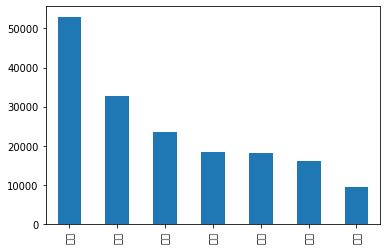

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
data["Emotion"].value_counts().plot(kind="bar")

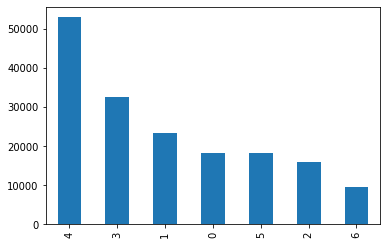

In [8]:
data["encoded_label"].value_counts().plot(kind="bar")

In [9]:
from sklearn.model_selection import train_test_split

target = data['encoded_label']
dataset = data.loc[:, ['Sentence', 'encoded_label']]

trainset, test_val_set = train_test_split(dataset,
                                    test_size=0.2,
                                    shuffle=True,
                                    random_state=42,
                                    stratify=target)

t_target = test_val_set['encoded_label']
testset, validset = train_test_split(test_val_set,
                                   test_size=0.5,
                                   shuffle=True,
                                   random_state=42,
                                   stratify=t_target)

trainset = trainset.reset_index(drop=True)
testset = testset.reset_index(drop=True)
validset = validset.reset_index(drop=True)

trainset.to_csv('trainset.csv')
testset.to_csv('testset.csv')
validset.to_csv('validset.csv')